# B-spline interpolation tutorial

This tutorial contains a synthetic interpolation example to compare results between [`spline_fxns.py`](https://github.com/NeuroDataDesign/brainlit/blob/jaco-sprint1/brainlit/algorithms/generate_fragments/spline_fxns.py) and the scipy class [`scipy.interpolate.BSpline`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.BSpline.html).

We are going to interpolate the 3D curve

$f(u) = \left[u^3, \sin u, u^2\right], u \in [-\pi, \pi]$

And compute its first and second derivatives component-wise.

## 1. Define and show the curve

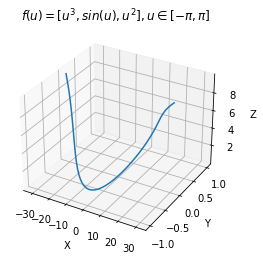

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splder, splprep, splrep, BSpline
from brainlit.algorithms.generate_fragments import spline_fxns

# define the paremeter space
theta = np.linspace(-np.pi, np.pi)
# define f(u)
X = theta**3
Y = np.sin(theta)
Z = theta**2
# define df(u)
dX = 3*theta**2
dY = np.cos(theta)
dZ = 2*theta
# define ddf(u)
ddX = 6*theta
ddY = -np.sin(theta)
ddZ = 2 * np.ones(len(theta))

C = [X, Y, Z]
dC = [dX, dY, dZ]
ddC = [ddX, ddY, ddZ]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection="3d")
ax.plot(X, Y, Z)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title(r"$f(u) = [u^3, sin(u), u^2], u \in [-\pi, \pi]$")
plt.show()

## 2. Compare the results

Text(0.5, 0.98, 'scipy.interpolate.BSpline')

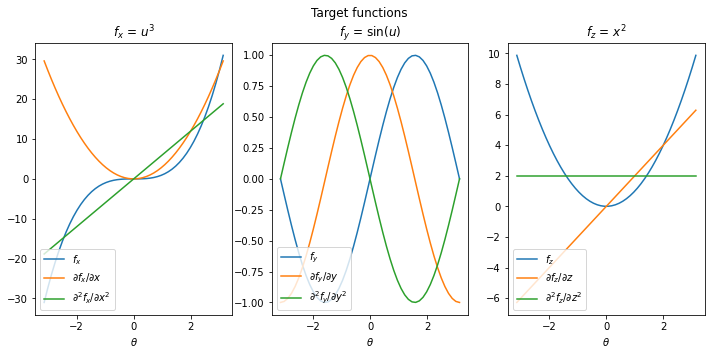

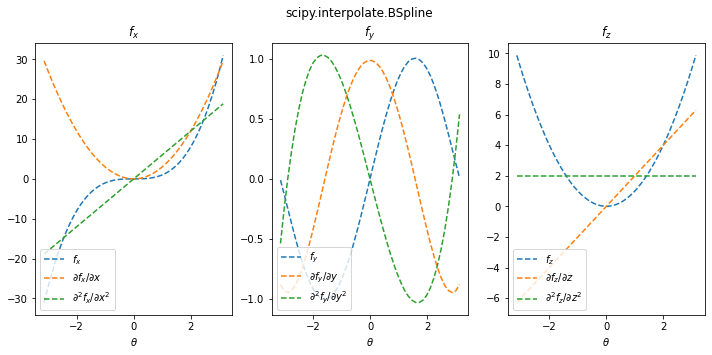

In [2]:
# find the B-spline that interpolates the curve
tck, u = splprep(C, u=theta, k=5)
t = tck[0]
cs = tck[1]
k =tck[2]
# define the components of f
dim = len(cs)
dims = ["x", "y", "z"]
fs = [r"$u^3$", r"$\sin(u)$", r"$x^2$"]

# show the target functions
fig = plt.figure(figsize=(12, 5))
axes = fig.subplots(1, 3)
for i, coord in enumerate(cs):
    ax = axes[i]
    ax.plot(theta, C[i], label=r"$f_%s$" % dims[i])
    ax.plot(theta, dC[i], label=r"$\partial f_%s/\partial %s$" % (dims[i], dims[i]))
    ax.plot(theta, ddC[i], label=r"$\partial^2 f_%s/\partial %s^2$" % (dims[i], dims[i]))
    ax.set_xlabel(r"$\theta$")
    ax.set_title(r"$f_%s$ = %s" % (dims[i], fs[i]))
    ax.legend(loc="lower left")
fig.suptitle("Target functions")

# show the results for the built-in scipy class
fig = plt.figure(figsize=(12, 5))
axes = fig.subplots(1, 3)
for i, coord in enumerate(cs):
    ax = axes[i]
    spl = BSpline(t, coord, k)
    dspl = spl.derivative()
    ddspl = dspl.derivative()
    ax.plot(u, spl(u), "--", label=r"$f_%s$" % dims[i])
    ax.plot(u, dspl(u), "--", label=r"$\partial f_%s/\partial %s$" % (dims[i], dims[i]))
    ax.plot(u, ddspl(u), "--", label=r"$\partial^2 f_%s/\partial %s^2$" % (dims[i], dims[i]))
    ax.set_xlabel(r"$\theta$")
    ax.set_title(r"$f_%s$" % dims[i])
    ax.legend(loc="lower left")
fig.suptitle("scipy.interpolate.BSpline")